In [20]:
from rdkit import Chem
from rdkit.Chem import AllChem

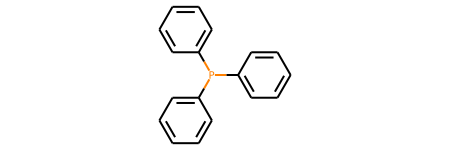

In [2]:
mol=Chem.MolFromSmiles('P(C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC=C3')
mol

In [21]:
def charge(mol, at_ind):
    AllChem.ComputeGasteigerCharges(mol)
    charges=mol.GetAtomWithIdx(at_ind).GetDoubleProp('_GasteigerCharge')
    return charges

In [73]:
startAtom=0
initialRadii2=[]
for i in radii1:
    atom=mol.GetAtomWithIdx(i)
    atIndRad2=[x.GetIdx() for x in atom.GetNeighbors()]
    initialRadii2.append(atIndRad2)
radii2  = set([val for sublist in initialRadii2 for val in sublist])
radii2.remove(startAtom)
numElement=len(radii2)
Q2=sum([charge(mol, i) for i in radii2])
print(numElement)
print(Q2)
print(list(radii2))

6
-0.3232365968735926
[2, 6, 8, 12, 14, 18]


In [102]:
#soc stands for sum over charge
def soc(smile, startAtom):
    mol=Chem.MolFromSmiles(smile)
    Q0=charge(mol, startAtom)
    print(Q0)
    
    atom1 = mol.GetAtomWithIdx(startAtom)
    radii1=[x.GetIdx() for x in atom1.GetNeighbors()]
    Q1=sum([charge(mol, i) for i in radii1])
    print(Q1)
    
    initialRadii2=[]
    for i in radii1:
        atom2=mol.GetAtomWithIdx(i)
        atIndRad2=[x.GetIdx() for x in atom2.GetNeighbors()]
        initialRadii2.append(atIndRad2)
    radii2  = set([val for sublist in initialRadii2 for val in sublist])
    radii2.remove(startAtom)
    numElement=len(radii2) #just to check how many atoms are there in radii2
    Q2=sum([charge(mol, i) for i in radii2])
    print(Q2)

In [78]:
soc('P(C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC=C3', 0)

-0.013435687534984822
-0.04536313583357551
-0.3232365968735926


In [86]:
soc('CC(C=C1)=CC=C1P(C2=CC=C(C)C=C2)C3=CC=CC=C3C', 7)

-0.013164994664711785
-0.04237728716082413
-0.31080776820751455


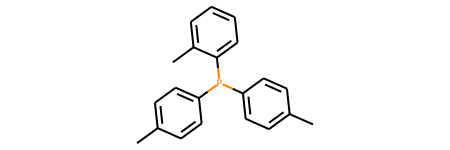

In [87]:
mol=Chem.MolFromSmiles('CC(C=C1)=CC=C1P(C2=CC=C(C)C=C2)C3=CC=CC=C3C')
mol

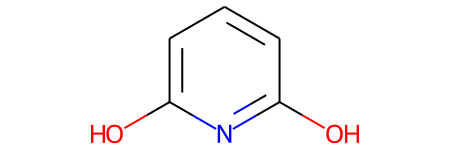

In [95]:
mol=Chem.MolFromSmiles('OC1=NC(O)=CC=C1')
mol

In [90]:
#trying something else, to see the atom index

In [89]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs

In [91]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

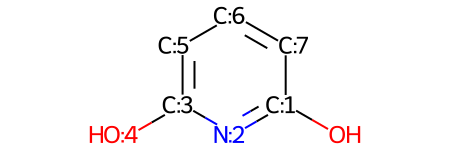

In [96]:
mol_with_atom_index(mol)

In [97]:
#Lets get the soc's about the nitrogen
soc('OC1=NC=CC=C1', 2)

-0.22227600231292152
0.2409857793122184
-0.536700449504709


In [98]:
charge(mol, 2)

-0.1781728805797921

In [103]:
soc('OC1=NC(O)=CC=C1', 2)

2 -0.1781728805797921
[1, 3] 0.4270584326998369
{0, 4, 5, 7} -0.9856415681610016
